<h1 style="text-align: center; color: #2c3e50;">ANOVA Project</h1>

<p style="text-align: center; font-size: 1.5em; color: #34495e; margin-bottom: 20px;">A collaborative analysis by:</p>

<div style="display: flex; flex-direction: column; align-items: center; margin-top: 30px;">

  <div style="display: flex; align-items: center; margin-bottom: 20px; width: 100%; max-width: 600px; border: 1px solid #bdc3c7; border-radius: 10px; padding: 15px; background-color: #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <img src="../assets/andi.jpg" alt="Andi Farras Thariq Hasibuan" style="width: 80px; height: 80px; border-radius: 50%; object-fit: cover; margin-right: 20px; border: 2px solid #2980b9;">
    <div>
      <p style="margin: 0; font-weight: bold; font-size: 1.2em;">Andi Farras Thariq Hasibuan</p>
      <p style="margin: 5px 0 0; color: #7f8c8d;">68766</p>
    </div>
  </div>
  
  <div style="display: flex; align-items: center; margin-bottom: 20px; width: 100%; max-width: 600px; border: 1px solid #bdc3c7; border-radius: 10px; padding: 15px; background-color: #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <img src="../assets/darren.png" alt="Mathew Darren Kusuma" style="width: 80px; height: 80px; border-radius: 50%; object-fit: cover; margin-right: 20px; border: 2px solid #2980b9;">
    <div>
      <p style="margin: 0; font-weight: bold; font-size: 1.2em;">Mathew Darren Kusuma</p>
      <p style="margin: 5px 0 0; color: #7f8c8d;">68772</p>
    </div>
  </div>

  <div style="display: flex; align-items: center; margin-bottom: 20px; width: 100%; max-width: 600px; border: 1px solid #bdc3c7; border-radius: 10px; padding: 15px; background-color: #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <img src="../assets/daffa.jpg" alt="Daffa Ilham Fadhillah" style="width: 80px; height: 80px; border-radius: 50%; object-fit: cover; margin-right: 20px; border: 2px solid #2980b9;">
    <div>
      <p style="margin: 0; font-weight: bold; font-size: 1.2em;">Daffa Ilham Fadhillah</p>
      <p style="margin: 5px 0 0; color: #7f8c8d;">68774</p>
    </div>
  </div>
  
  <div style="display: flex; align-items: center; margin-bottom: 20px; width: 100%; max-width: 600px; border: 1px solid #bdc3c7; border-radius: 10px; padding: 15px; background-color: #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
    <img src="../assets/michelle.jpg" alt="Michelle Ha" style="width: 80px; height: 80px; border-radius: 50%; object-fit: cover; margin-right: 20px; border: 2px solid #2980b9;">
    <div>
      <p style="margin: 0; font-weight: bold; font-size: 1.2em;">Michelle Ha</p>
      <p style="margin: 5px 0 0; color: #7f8c8d;">68777</p>
    </div>
  </div>
</div>

<p style="text-align: center; margin-top: 30px; font-style: italic; color: #34495e;">
  "You can have data without information, but you cannot have information without data." - Daniel Keys Moran
</p>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Contoh Perhitungan ANOVA One-Way Manual

## Menentukan Hipotesis Null, Hipotesis Alternatif, dan Nilai Alpha

- **Null Hypothesis**:  
  $H_0: \mu_{\text{Aceh}} = \mu_{\text{Bekasi}} = \mu_{\text{Cirebon}}$  
  Rata-rata pengeluaran warga Aceh, Bekasi, and Cirebon sama.

- **Alternative Hypothesis**:  
  $H_1$: Setidaknya satu rata-rata berbeda.  
  Setidaknya terdapat satu kota dengan rata-rata yang berbeda

## Pengambilan Data

In [2]:
# Membuat dataset untuk contoh
data = {
    "Provinsi": ["Aceh", "Aceh", "Bekasi", "Bekasi", "Cirebon", "Cirebon", "Aceh", "Bekasi", "Cirebon"],
    "Pengeluaran (Jt)": [23, 20, 27, 28, 22, 21, 25, 30, 23]
}

df = pd.DataFrame(data)
df

,Provinsi,Pengeluaran (Jt)
0,Aceh,23
1,Aceh,20
2,Bekasi,27
3,Bekasi,28
4,Cirebon,22
5,Cirebon,21
6,Aceh,25
7,Bekasi,30
8,Cirebon,23


## Melakukan cek asumsi terhadap data



Asumsikan bahwa data kita sudah memenuhi asumsi yang dibutuhkan

## Melakukan Uji Statistik (Kalkulasi nilai F)

$$
F = \frac{\text{MSB}}{\text{MSW}} = \frac{\frac{\text{SSB}}{k-1}}{\frac{\text{SSW}}{n-k}}
$$

Where:

- **SSB (Sum of Squares Between Groups)**:
  $$
  \text{SSB} = \sum_{i=1}^{k} n_i (\bar{X}_i - \bar{X})^2
  $$

- **SSW (Sum of Squares Within Groups)**:
  $$
  \text{SSW} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2
  $$

- **MSB (Mean Square Between Groups)**:
  $$
  \text{MSB} = \frac{\text{SSB}}{k-1}
  $$

- **MSW (Mean Square Within Groups)**:
  $$
  \text{MSW} = \frac{\text{SSW}}{n-k}
  $$

Where:
- $k$ = Number of groups
- $n_i$ = Sample size of group \( i \)
- $\bar{X}_i$ = Mean of group \( i \)
- $\bar{X}$ = Overall mean
- $n$ = Total number of observations


In [3]:
# Melakukan kalkulasi F secara manual (menggunakan rumus diatas)

# Kalkulasi rata rata setiap group dan rata rata keseluruhan data
group_means = df.groupby('Provinsi')['Pengeluaran (Jt)'].mean()
overall_mean = df['Pengeluaran (Jt)'].mean()

# Kalkulasi SSB (Sum of Squares Between)
ssb = sum(df.groupby('Provinsi').size() * (group_means - overall_mean) ** 2)

# Kalkulasi SSW (Sum of Squares Within)
def calc_ssw(group):
    return sum((group - group.mean()) ** 2)

ssw = df.groupby('Provinsi')['Pengeluaran (Jt)'].apply(calc_ssw).sum()

# Kalkulasi degrees of freedom
df_between = df['Provinsi'].nunique() - 1  # k - 1
df_within = df.shape[0] - df['Provinsi'].nunique()  # n - k

# Kalkulasi MSB and MSW
msb = ssb / df_between
msw = ssw / df_within

# Kalkulasi F-statistic
f_stat_manual = msb / msw


# Kalkulasi dengan menggunakan library Scipy
groups = [df[df['Provinsi'] == province]['Pengeluaran (Jt)'] for province in df['Provinsi'].unique()]
f_stat_scipy, p_value = stats.f_oneway(*groups)

# Print results
print(f"Manual F-statistic: {f_stat_manual}")
print(f"Scipy F-statistic: {f_stat_scipy}")
print(f"Scipy p-value: {p_value}")


Manual F-statistic: 11.275862068965509
Scipy F-statistic: 11.275862068965521
Scipy p-value: 0.009280187148601704


## Interpretasi hasil dan menentukan keputusan terhadap hipotesis null

### Interpretasi F-statistic
- **F-statistic** mengukur perbandingan antara variasi antar kelompok (antara provinsi) dengan variasi dalam kelompok (di dalam setiap provinsi).
- Jika F-statistic **lebih besar**, ini berarti variasi antar kelompok lebih besar dibandingkan variasi dalam kelompok, yang menunjukkan bahwa mungkin ada perbedaan signifikan antar kelompok (provinsi).
- Jika F-statistic mendekati 1 atau lebih kecil, ini menunjukkan bahwa variasi antar kelompok tidak lebih besar dari variasi dalam kelompok, yang berarti tidak ada bukti yang cukup untuk menyatakan adanya perbedaan antara rata-rata provinsi.

### Interpretasi p-value
- **p-value** menunjukkan seberapa kuat bukti untuk menolak hipotesis nol (H₀). Hipotesis nol menyatakan bahwa rata-rata pengeluaran (Jt) di Aceh, Bekasi, dan Cirebon adalah sama.
- **p-value kecil** (biasanya kurang dari 0,05 jika tingkat signifikansi 5%) menunjukkan bukti kuat untuk menolak H₀. Sebaliknya, p-value yang lebih besar dari 0,05 menunjukkan bukti yang lemah untuk menolak H₀.

### Contoh Interpretasi Berdasarkan Hasil
Misalkan hasil yang kamu dapatkan adalah:

- **F-statistic**: 11.276  
- **p-value**: 0.009

Pada tingkat signifikansi 5%:

- Karena **p-value 0.009 < 0.05**, kita **menolak hipotesis nol (H₀)**. Artinya, kita memiliki bukti yang cukup untuk menyatakan bahwa setidaknya ada satu perbedaan signifikan dalam pengeluaran (Jt) antara Aceh, Bekasi, dan Cirebon.

Jika p-value lebih besar dari 0,05, kita akan gagal menolak H₀ dan menyimpulkan bahwa tidak ada bukti kuat untuk menunjukkan adanya perbedaan pengeluaran di ketiga provinsi tersebut.

# CANOVA (Coding for ANOVA)

## Data

In [4]:
df = pd.read_csv("../datasets/Kesejahteraan Pekerja/upah.df.csv")
df = df[df["provinsi"] != "INDONESIA"]
df = df.reset_index(drop=True)
df.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


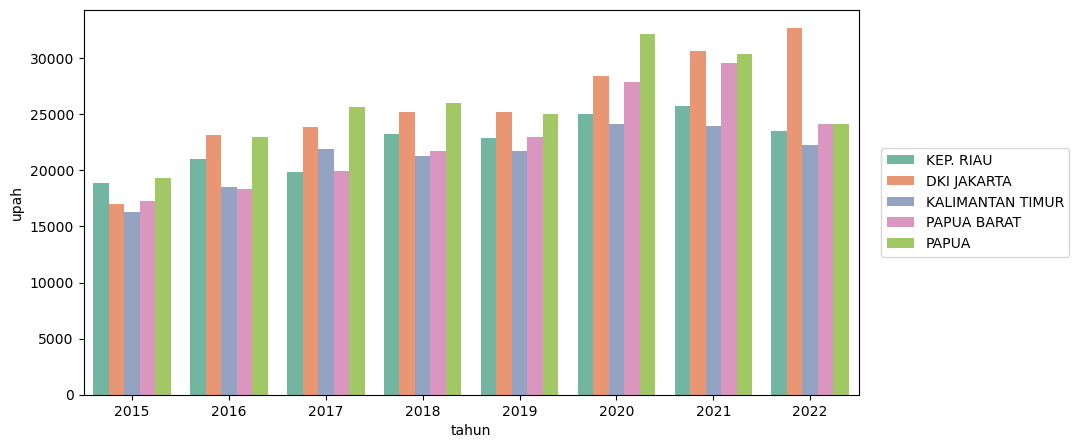

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df[df["provinsi"].isin(
        df.groupby("provinsi")["upah"].sum().sort_values(ascending=False)[:5].index
    )],
    x="tahun",
    y="upah",
    hue="provinsi",
    palette="Set2"
)
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.show()

In [6]:
df.isna().sum()

provinsi    0
tahun       0
upah        0
dtype: int64

## Assumptions

### Normality

In order to perform an ANOVA, one of the key assumptions is that the dependent variable should be normally distributed within each group (subpopulation). This means that for each group or category of the independent variable, the distribution of the dependent variable should approximate a normal (bell-shaped) distribution.

To test whether the normality assumption is met, we typically use normality tests such as the **Shapiro-Wilk Test**. The hypothesis for this test is:

- **Null Hypothesis (H₀)**: The data is normally distributed.
- **Alternative Hypothesis (H₁)**: The data is not normally distributed.

#### Interpretation

- If the p-value of the test is **greater than 0.05**, we fail to reject the null hypothesis, meaning the data follows a normal distribution.
- If the p-value is **less than or equal to 0.05**, we reject the null hypothesis, indicating the data does not follow a normal distribution.

In [7]:
shapiro_results = []

for provinsi, group_data in df.groupby("provinsi"):
    temp = group_data.iloc[:, -1].dropna()
    shapiro_stat, shapiro_p_value = stats.shapiro(temp)
    is_normal_shapiro = True if shapiro_p_value > 0.05 else False

    shapiro_results.append({
        "provinsi": provinsi,
        "Shapiro-Wilk statistics": shapiro_stat,
        "Shapiro-Wilk p-value": shapiro_p_value,
        "Shapiro-Wilk normality": is_normal_shapiro,
        "Count": len(temp),
        "Year": np.sort(group_data["tahun"].unique())
    })

normality_df = pd.DataFrame(shapiro_results)

In [8]:
normality_df_true = normality_df[
    (normality_df["Shapiro-Wilk normality"] == True) &
    (normality_df["Count"] == 8)
].reset_index(drop=True)
normality_df_true

,provinsi,Shapiro-Wilk statistics,Shapiro-Wilk p-value,Shapiro-Wilk normality,Count,Year
0,ACEH,0.966465,0.868918,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
1,BALI,0.836392,0.069146,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
2,BANTEN,0.891871,0.243571,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
3,BENGKULU,0.931484,0.529684,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
4,DI YOGYAKARTA,0.944731,0.658143,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
5,DKI JAKARTA,0.961563,0.824856,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
6,GORONTALO,0.946441,0.675337,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
7,JAMBI,0.876101,0.172771,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
8,JAWA BARAT,0.904868,0.319338,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
9,JAWA TENGAH,0.933712,0.550457,True,8,"[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"


### Homogeneity of Variance

The homogeneity assumption in ANOVA requires that the variance of the dependent variable is equal across all subpopulations (groups) defined by the independent variable. This ensures that differences in group means are not due to unequal variability between groups.

To test this assumption, we use tests like **Levene’s Test**. The hypothesis for this test is:

- **Null Hypothesis (H₀)**: The variances across the groups are equal (homogeneous).
- **Alternative Hypothesis (H₁)**: The variances across the groups are not equal (heterogeneous).

#### Interpretation

- If the p-value of Levene’s test is **greater than 0.05**, we fail to reject the null hypothesis, meaning the variances are equal across groups, and the homogeneity assumption is met.
- If the p-value is **less than or equal to 0.05**, we reject the null hypothesis, indicating that the variances are unequal across the groups, and the homogeneity assumption is violated.

In [9]:
province_combinations = list(itertools.combinations(normality_df_true["provinsi"], 3))
levene_results = []

for comb in province_combinations:
    levene_stat, levene_p_value = stats.levene(
        *[df[df["provinsi"] == prov].iloc[:, -1].dropna() for prov in comb],
        center="mean"
    )

    is_homogeneous = True if levene_p_value > 0.05 else False

    levene_results.append({
        "Combination": comb,
        "Levene Statistic": levene_stat,
        "Levene p-value": levene_p_value,
        "Homogeneity": is_homogeneous
    })

levene_df = pd.DataFrame(levene_results)

In [10]:
levene_df_true = levene_df[levene_df["Homogeneity"] == True].reset_index(drop=True)
levene_df_true

,Combination,Levene Statistic,Levene p-value,Homogeneity
0,"(ACEH, BALI, BANTEN)",0.343077,0.713487,True
1,"(ACEH, BALI, BENGKULU)",0.105066,0.900735,True
2,"(ACEH, BALI, DI YOGYAKARTA)",0.089502,0.914733,True
3,"(ACEH, BALI, DKI JAKARTA)",2.615085,0.096804,True
4,"(ACEH, BALI, GORONTALO)",0.269822,0.766122,True
...,...,...,...,...
4731,"(SULAWESI TENGGARA, SUMATERA SELATAN, SUMATERA...",1.780338,0.193099,True
4732,"(SULAWESI UTARA, SUMATERA BARAT, SUMATERA SELA...",0.588168,0.564235,True
4733,"(SULAWESI UTARA, SUMATERA BARAT, SUMATERA UTARA)",0.431090,0.655422,True
4734,"(SULAWESI UTARA, SUMATERA SELATAN, SUMATERA UT...",0.665404,0.524573,True


## One-Way ANOVA

**One-Way ANOVA (Analysis of Variance)** is a statistical test used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. It helps to identify if at least one group mean is different from the others.

The hypotheses for One-Way ANOVA are:

- **Null Hypothesis (H₀)**: All group means are equal.
- **Alternative Hypothesis (H₁)**: At least one group mean is different.

### Interpretation

- If the **p-value** of the ANOVA test is **less than or equal to 0.05**, we reject the null hypothesis, suggesting that at least one group mean is significantly different.
- If the **p-value** is **greater than 0.05**, we fail to reject the null hypothesis, meaning there is no evidence that the group means are different.

### Post-hoc Tests

If the ANOVA test indicates a significant difference, post-hoc tests such as **Tukey's HSD** or **Bonferroni** are used to determine which specific groups differ from each other. These tests help to control for Type I error when making multiple comparisons.

In [11]:
anova_results = []

for _, row in levene_df_true.iterrows():
    comb = row["Combination"]

    anova_stat, anova_p_value = stats.f_oneway(
        *[df[df["provinsi"] == prov].iloc[:, -1].dropna() for prov in comb]
    )

    is_significant = True if anova_p_value < 0.05 else False

    anova_results.append({
        "Combination": comb,
        "ANOVA Statistic": anova_stat,
        "ANOVA p-value": anova_p_value,
        "Significant Difference": is_significant
    })

anova_df = pd.DataFrame(anova_results)

In [12]:
anova_df_true = anova_df[anova_df["Significant Difference"] == True].reset_index(drop=True)
anova_df_true

,Combination,ANOVA Statistic,ANOVA p-value,Significant Difference
0,"(ACEH, BALI, BANTEN)",12.661565,0.000247,True
1,"(ACEH, BALI, DKI JAKARTA)",25.903037,0.000002,True
2,"(ACEH, BALI, GORONTALO)",3.533945,0.047544,True
3,"(ACEH, BALI, JAWA TENGAH)",11.310744,0.000464,True
4,"(ACEH, BALI, JAWA TIMUR)",4.269639,0.027804,True
...,...,...,...,...
3862,"(SULAWESI TENGGARA, SUMATERA BARAT, SUMATERA U...",6.506421,0.006325,True
3863,"(SULAWESI TENGGARA, SUMATERA SELATAN, SUMATERA...",8.530501,0.001942,True
3864,"(SULAWESI UTARA, SUMATERA BARAT, SUMATERA SELA...",6.993109,0.004703,True
3865,"(SULAWESI UTARA, SUMATERA BARAT, SUMATERA UTARA)",6.947618,0.004833,True


In [13]:
anova_df_true.iloc[129]

Combination               (ACEH, JAWA BARAT, SUMATERA UTARA)
ANOVA Statistic                                     3.566076
ANOVA p-value                                       0.046416
Significant Difference                                  True
Name: 129, dtype: object

### Interpretation of ANOVA Test Result

For the combination of **ACEH, JAWA BARAT, and SUMATERA UTARA**:

- **ANOVA Statistic**: 3.566076
  - This is the calculated F-statistic for this specific test. It indicates the ratio of variance between groups to variance within groups. A higher value suggests a greater difference between group means.
  
- **ANOVA p-value**: 0.046416
  - The p-value indicates the probability of observing the data if the null hypothesis (that all group means are equal) is true. In this case, the p-value is **0.046416**, which is **less than 0.05**. This suggests that there is a statistically significant difference between at least one of the group means.
  - Or the p-value tells us that there is about a **95.36% chance** (1 - 0.046416) that if we were to conduct the same test repeatedly under the same conditions, we would not find significant differences if the null hypothesis were true.

The p-value indicates the probability of observing the data if the null hypothesis (that all group means are equal) is true. In this case, the p-value is **0.046416**, which is **less than 0.05**. This suggests that there is a statistically significant difference between at least one of the group means.

## Post Hoc

### Tukey’s Honest Significant Difference (HSD) Test

After conducting a one-way ANOVA and finding that there is a significant difference between group means, we can use Tukey’s HSD test to determine which specific group pairs are significantly different from each other.

#### Hypotheses for Each Pair:
- **Null Hypothesis (H₀)**: The means of the two groups are equal.
- **Alternative Hypothesis (H₁)**: The means of the two groups are not equal.

#### Interpretation:
- **meandiff**: The difference in means between two groups.
- **p-adj**: The adjusted p-value that indicates whether the difference is statistically significant. 
  - If the p-value is **less than or equal to 0.05**, we reject the null hypothesis, meaning there is a statistically significant difference between the groups.
  - If the p-value is **greater than 0.05**, we fail to reject the null hypothesis, meaning the difference between the groups is not statistically significant.
- **lower & upper**: The confidence interval for the difference in means.
- **reject**: A boolean (True/False) indicating whether the null hypothesis is rejected (True means there is a significant difference between the group means).

In [14]:
for i, row in anova_df_true.iloc[[129]].iterrows():
    provinces = row["Combination"]
    filtered_df = df[df["provinsi"].isin(provinces)]

    tukey = pairwise_tukeyhsd(
        endog=filtered_df["upah"],
        groups=filtered_df["provinsi"],
        alpha=0.05
    )

    print(f"Combination: {provinces}")
    print(tukey)

Combination: ('ACEH', 'JAWA BARAT', 'SUMATERA UTARA')
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1       group2      meandiff p-adj    lower    upper   reject
--------------------------------------------------------------------
      ACEH     JAWA BARAT  1728.875 0.3158  -1196.21  4653.96  False
      ACEH SUMATERA UTARA -1363.125 0.4808  -4288.21  1561.96  False
JAWA BARAT SUMATERA UTARA   -3092.0 0.0371 -6017.085 -166.915   True
--------------------------------------------------------------------


### Interpretation of Tukey HSD Results

For the combination of provinces **ACEH**, **JAWA BARAT**, and **SUMATERA UTARA**, Tukey's HSD test reveals the following:

#### 1. **ACEH vs JAWA BARAT**
- **Mean Difference (meandiff)**: 1728.88 (ACEH has a higher mean than JAWA BARAT by this value).
- **p-adj**: 0.3158 (greater than 0.05), so we **fail to reject the null hypothesis**. There is no statistically significant difference in the means between ACEH and JAWA BARAT.
- **Confidence Interval**: [-1196.21, 4653.96] (the interval includes zero, further indicating no significant difference).
- **Reject**: False (no significant difference between the groups).

#### 2. **ACEH vs SUMATERA UTARA**
- **Mean Difference (meandiff)**: -1363.13 (ACEH has a lower mean than SUMATERA UTARA by this value).
- **p-adj**: 0.4808 (greater than 0.05), so we **fail to reject the null hypothesis**. There is no statistically significant difference in the means between ACEH and SUMATERA UTARA.
- **Confidence Interval**: [-4288.21, 1561.96] (the interval includes zero, indicating no significant difference).
- **Reject**: False (no significant difference between the groups).

#### 3. **JAWA BARAT vs SUMATERA UTARA**
- **Mean Difference (meandiff)**: -3092.00 (JAWA BARAT has a lower mean than SUMATERA UTARA by this value).
- **p-adj**: 0.0371 (less than 0.05), so we **reject the null hypothesis**. There is a statistically significant difference in the means between JAWA BARAT and SUMATERA UTARA.
- **Confidence Interval**: [-6017.085, -166.915] (the interval does not include zero, confirming a significant difference).
- **Reject**: True (significant difference between the groups).